# Challenge 1: Titanic - Machine Learning From Disaster 

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open("Titanic.jpg")

## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Bộ dữ liệu Titanic chứa thông tin về các hành khách trên con tàu Titanic bị chìm năm 1912. Mục tiêu của bài toán là dự đoán khả năng sống sót của hành khách dựa trên các đặc điểm cá nhân như tuổi, giới tính, hạng vé, giá vé, v.v. Đây là một bài toán phân loại nhị phân (binary classification) trong học máy.

+ **Dữ liệu vào**:
    + Pclass – Hạng vé (1 = Hạng nhất, 2 = Hạng hai, 3 = Hạng ba)
    + Name – Tên hành khách
    + Sex – Giới tính
    + Age – Tuổi của hành khách
    + SibSp – Số anh/chị/em ruột hoặc vợ/chồng đi cùng
    + Parch – Số cha/mẹ hoặc con đi cùng
    + Ticket – Mã vé
    + Fare – Giá vé
    + Cabin – Số phòng
    + Embarked – Cảng lên tàu (C = Cherbourg, Q = Queenstown, S = Southampton)
    
+ **Kết quả**: Survived - Biến mục tiêu (Target Variable): 
    + 0: Không sống sót
    + 1: Sống sót

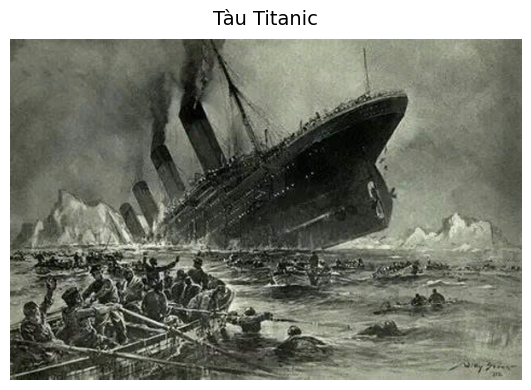

In [2]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.imshow(image.resize((600, 400)))
ax.axis("off")
ax.set_title("Tàu Titanic", fontsize=14, pad=10)
plt.tight_layout()
plt.show()

## 2. Chuẩn bị vấn đề (Prepare Problem)

### Khai báo thư viện (Load Libraries)

In [3]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split


import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

### Tham số chương trình

In [4]:
# params
seed = 42  # random seed để tái dựng lại thực nghiệm giống nhau

exps_dir = "../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)

### Nạp dữ liệu (Load Dataset)

In [5]:
# Load dataset
df_train_org = pd.read_csv("../../data/train.csv")
df_test_org = pd.read_csv("../../data/test.csv")

## 3. Tiền xử lý dữ liệu (Data Preprocessing)

### Làm sạch dữ liệu (Data Cleaning)

#### Tạo bảng dữ liệu làm sạch
+ Chỉ giữ lại các cột Input, Ouput

In [6]:
df_train = df_train_org.copy()
df_test =df_test_org.copy()

#### Xử lý giá trị rỗng, không hợp lệ

In [7]:
print("="*5, "Null Value", "="*5)
display.display(df_train.isnull().sum())
display.display(df_test.isnull().sum())

print("="*5, "Checking NaN", "="*5)
display.display(df_train.isna().sum())
display.display(df_test.isnull().sum())

===== Null Value =====


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

===== Checking NaN =====


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df_train["Age"].fillna(df_train["Age"].median(), inplace=True)
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)
df_train["Cabin"] = df_train["Cabin"].fillna('Z')
df_test["Age"].fillna(df_test["Age"].median(),inplace=True)
df_test["Cabin"] = df_test["Cabin"].fillna('Z')
df_test["Fare"] = df_test.groupby("Pclass")["Fare"].transform(
    lambda x: x.fillna(x.median())
)

In [9]:
# Debug
print("Tập train sau khi điền missing values")
# Age: lay median
print(f'Age IsNa: {df_train["Age"].isna().sum()}')
print(f"Age Median: {df_train['Age'].median()}")
# Embarked
display.display(df_train["Fare"].value_counts())
# Cabin
print("-"*10, "Cabin")
display.display(np.unique(df_train['Cabin'].apply(
    lambda x: 'Z0' if pd.isna(x) else x), return_counts=True))

print("Tập test sau khi điền missing values")
# Age: lay median
print(f'Age IsNa: {df_test["Age"].isna().sum()}')
print(f"Age Median: {df_test['Age'].median()}")
# Fare
display.display(df_test["Fare"].describe())
# Cabin
print("-"*10, "Cabin")
display.display(np.unique(df_test['Cabin'].apply(
    lambda x: 'Z0' if pd.isna(x) else x), return_counts=True))

Tập train sau khi điền missing values
Age IsNa: 0
Age Median: 28.0


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

---------- Cabin


(array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
        'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
        'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
        'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
        'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
        'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
        'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
        'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
        'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
        'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
        'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
        'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
        'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
        'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',

Tập test sau khi điền missing values
Age IsNa: 0
Age Median: 27.0


count    418.000000
mean      35.560845
std       55.856972
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

---------- Cabin


(array(['A11', 'A18', 'A21', 'A29', 'A34', 'A9', 'B10', 'B11', 'B24',
        'B26', 'B36', 'B41', 'B45', 'B51 B53 B55', 'B52 B54 B56',
        'B57 B59 B63 B66', 'B58 B60', 'B61', 'B69', 'B71', 'B78', 'C101',
        'C105', 'C106', 'C116', 'C130', 'C132', 'C22 C26', 'C23 C25 C27',
        'C28', 'C31', 'C32', 'C39', 'C46', 'C51', 'C53', 'C54', 'C55 C57',
        'C6', 'C62 C64', 'C7', 'C78', 'C80', 'C85', 'C86', 'C89', 'C97',
        'D', 'D10 D12', 'D15', 'D19', 'D21', 'D22', 'D28', 'D30', 'D34',
        'D37', 'D38', 'D40', 'D43', 'E31', 'E34', 'E39 E41', 'E45', 'E46',
        'E50', 'E52', 'E60', 'F', 'F E46', 'F E57', 'F G63', 'F2', 'F33',
        'F4', 'G6', 'Z'], dtype=object),
 array([  1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   1,   2,
          1,   1,   3,   1,   1,   1,   1,   1,   2,   1,   1,   2,   1,
          1,   1,   2,   1,   2,   1,   1,   1,   1,   1,   1,   2,   2,
          1,   1,   2,   2,   1,   1,   2,   1,   1,   1,   1,   1,   1,
          1, 

### Biến đổi dữ liệu (Data Transforms)

#### Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [10]:
def label_encode_columns(df, save_dir):
    encoders = {}
    df_encoded = df.copy()

    # Xác định các cột phân loại (object hoặc category)
    categorical_cols = ["Sex","Cabin","Embarked"]

    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        encoders[col] = le

        # Lưu encoder
        joblib.dump(le, f"{save_dir}/{col}_encoder.joblib")
        print(f"Encoded column: {col} → saved to {col}_encoder.joblib")

    return df_encoded, encoders

In [11]:
df_train_encoded, encoders = label_encode_columns(df_train, save_dir)
display.display(df_train_encoded.head())

Encoded column: Sex → saved to Sex_encoder.joblib
Encoded column: Cabin → saved to Cabin_encoder.joblib
Encoded column: Embarked → saved to Embarked_encoder.joblib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [12]:
df_test_encoded, encoders = label_encode_columns(df_test, save_dir)
display.display(df_train_encoded.head())

Encoded column: Sex → saved to Sex_encoder.joblib
Encoded column: Cabin → saved to Cabin_encoder.joblib
Encoded column: Embarked → saved to Embarked_encoder.joblib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


#### Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

##### Min-Max Normalization

In [13]:
# Min-Max Normalization
scale_columns = ["Age", "Fare"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_train_encoded[scale_columns])
df_minmax = df_train_encoded.copy()
df_test_minmax = df_test_encoded.copy()
df_minmax[scale_columns] = minmax_scaler.transform(df_train_encoded[scale_columns])
df_test_minmax[scale_columns] = minmax_scaler.transform(df_test_encoded[scale_columns])
display.display(df_minmax)
display.display(df_test_minmax)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,55,2
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0.334004,0,0,211536,0.025374,147,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0.233476,0,0,112053,0.058556,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.346569,1,2,W./C. 6607,0.045771,147,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0.321438,0,0,111369,0.058556,60,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,0.428248,0,0,330911,0.015282,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,0.585323,1,0,363272,0.013663,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,0.773813,0,0,240276,0.018909,76,1
3,895,3,"Wirz, Mr. Albert",1,0.334004,0,0,315154,0.016908,76,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.271174,1,1,3101298,0.023984,76,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,0.334004,0,0,A.5. 3236,0.015713,76,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,0.484795,0,0,PC 17758,0.212559,22,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,0.478512,0,0,SOTON/O.Q. 3101262,0.014151,76,2
416,1308,3,"Ware, Mr. Frederick",1,0.334004,0,0,359309,0.015713,76,2


In [14]:
minmax_scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['Age', 'Fare'], dtype=object),
 'n_features_in_': 2,
 'n_samples_seen_': 891,
 'scale_': array([0.01256597, 0.00195187]),
 'min_': array([-0.00527771,  0.        ]),
 'data_min_': array([0.42, 0.  ]),
 'data_max_': array([ 80.    , 512.3292]),
 'data_range_': array([ 79.58  , 512.3292])}

In [15]:
# Save encoders
joblib.dump(minmax_scaler, f'{save_dir}/minmax_scaler.joblib')

['../exps/feature1/minmax_scaler.joblib']

In [16]:
joblib.load(f'{save_dir}/minmax_scaler.joblib').__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['Age', 'Fare'], dtype=object),
 'n_features_in_': 2,
 'n_samples_seen_': 891,
 'scale_': array([0.01256597, 0.00195187]),
 'min_': array([-0.00527771,  0.        ]),
 'data_min_': array([0.42, 0.  ]),
 'data_max_': array([ 80.    , 512.3292]),
 'data_range_': array([ 79.58  , 512.3292])}

In [17]:
# save scale_columns
np.savez(f'{save_dir}/scale_columns.npz', scale_columns = scale_columns)
dict(np.load(f'{save_dir}/scale_columns.npz'))

{'scale_columns': array(['Age', 'Fare'], dtype='<U4')}

In [18]:
df_minmax[scale_columns].plot(kind="box", figsize=(12,6))

<Axes: >

### Lưu dữ liệu Features

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [19]:
# MinMax
x_train = df_minmax.values[:, :-1]
y_train = df_minmax.values[:, -1]
display.display(df_minmax.head())

print("+ x_train: \n ", x_train[:5, :])
print("+ y_train: \n ", y_train[:5])

np.savez(f'{save_dir}/feat_minmax.npz', x_train = x_train, y_train = y_train)
df_minmax.to_excel(f'{save_dir}/df_minmax.xlsx', index=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,55,2
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,147,2


+ x_train: 
  [[1 0 3 'Braund, Mr. Owen Harris' 1 0.2711736617240512 1 0 'A/5 21171'
  0.014151057562208049 147]
 [2 1 1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 0
  0.4722292033174164 1 0 'PC 17599' 0.13913573538264068 81]
 [3 1 3 'Heikkinen, Miss. Laina' 0 0.32143754712239253 0 0
  'STON/O2. 3101282' 0.015468569817999833 147]
 [4 1 1 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 0
  0.4345312892686604 1 0 '113803' 0.10364429745562033 55]
 [5 0 3 'Allen, Mr. William Henry' 1 0.4345312892686604 0 0 '373450'
  0.015712553569072387 147]]
+ y_train: 
  [2 0 2 2 2]


In [20]:
df_minmax.shape

(891, 12)

In [21]:
# MinMax
x_test = df_test_minmax.values[:, :-1]
display.display(df_test_minmax.head())

print("+ x_test: \n ", x_test[:5, :])

np.savez(f'{save_dir}/feat_minmax_test.npz', x_test = x_test)
df_test_minmax.to_excel(f'{save_dir}/df_test_minmax.xlsx', index=False)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,0.428248,0,0,330911,0.015282,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,0.585323,1,0,363272,0.013663,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,0.773813,0,0,240276,0.018909,76,1
3,895,3,"Wirz, Mr. Albert",1,0.334004,0,0,315154,0.016908,76,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.271174,1,1,3101298,0.023984,76,2


+ x_test: 
  [[892 3 'Kelly, Mr. James' 1 0.4282483035938678 0 0 '330911'
  0.015281580671177828 76]
 [893 3 'Wilkes, Mrs. James (Ellen Needs)' 0 0.5853229454636844 1 0
  '363272' 0.013663090060062943 76]
 [894 2 'Myles, Mr. Thomas Francis' 1 0.7738125157074642 0 0 '240276'
  0.018908740708122825 76]
 [895 3 'Wirz, Mr. Albert' 1 0.33400351847197784 0 0 '315154'
  0.016908073949327893 76]
 [896 3 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)' 0
  0.2711736617240512 1 1 '3101298' 0.023983602730431916 76]]


In [22]:
df_test_minmax.shape

(418, 11)

### Chia dữ liệu huấn luyện - thực nghiệm
- Trong quá trình huấn luyện, tập Train tiếp tục được chia thành Train (80%) và Validation (20%) theo chiến lược stratified sampling để đảm bảo tỉ lệ nhãn Survived cân bằng giữa các tập.

In [23]:
index_all = np.arange(len(df_train_org))
index_train, index_val = train_test_split(index_all, test_size=0.2, random_state=seed)

In [24]:
df_train_split = df_minmax.iloc[index_train]
df_val_split = df_minmax.iloc[index_val]

In [25]:
print(f"Tập train: {len(df_train_split)} mẫu")
print(f"Tập val:   {len(df_val_split)} mẫu")
print(f"Tập test:  {len(df_test)} mẫu")

Tập train: 712 mẫu
Tập val:   179 mẫu
Tập test:  418 mẫu


In [26]:
# Lưu dữ liệu sau khi chia
df_train_split.to_excel(f'{exps_dir}/data/train.xlsx', index=None)
df_val_split.to_excel(f'{exps_dir}/data/valid.xlsx', index=None)
df_test_minmax.to_excel(f'{exps_dir}/data/test.xlsx', index=None)

np.savez(f'{exps_dir}/data/idx.npz', id_train = index_train, id_val = index_val)

In [27]:
# Kiểm tra lại
dict(np.load(f'{exps_dir}/data/idx.npz'))

{'id_train': array([331, 733, 382, 704, 813, 118, 536, 361,  29,  55, 865, 595, 239,
        721,  81, 259, 486, 716, 800, 781, 542, 326, 534, 535, 483, 762,
        533, 713, 390, 495, 482, 377, 365, 412, 468, 409,   7, 580, 155,
        880, 425, 101, 199, 424, 298, 884, 247, 478, 305, 316,   2, 405,
        742, 260, 367, 158, 554, 829, 677, 380, 626, 302, 432, 522, 404,
        843, 355, 464, 753, 212, 449,  79, 148, 428,  60, 660, 804, 588,
        765, 265, 133, 708, 544, 346, 821, 633, 456, 500, 430, 445, 650,
        172, 450, 314, 332, 801,  90, 834, 181, 581, 795,  69, 131, 334,
        597, 135, 164,  28, 783, 193, 869, 715, 525, 381, 140, 173,   6,
        718, 685,  73, 882, 328, 453, 145, 234, 220, 370, 811, 132, 694,
        864, 185,  41, 547, 108, 603,  56, 394, 706, 549,  24, 351, 429,
        434,  51, 526, 816, 569, 264, 436, 613, 693, 352,  18, 666, 582,
         83,  61, 272, 285, 695, 746,  12, 182, 444, 552, 223, 513, 628,
        587, 692, 523, 664, 176, 841, 6

In [28]:
pd.read_excel(f'{exps_dir}/data/train.xlsx')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,332,0,1,"Partner, Mr. Austen",1,0.566474,0,0,113043,0.055628,56,2
1,734,0,2,"Berriman, Mr. William John",1,0.283740,0,0,28425,0.025374,147,2
2,383,0,3,"Tikkanen, Mr. Juho",1,0.396833,0,0,STON/O 2. 3101293,0.015469,147,2
3,705,0,3,"Hansen, Mr. Henrik Juul",1,0.321438,1,0,350025,0.015330,147,2
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,0.070118,4,2,347082,0.061045,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,0.258608,0,0,343120,0.014932,147,2
708,271,0,1,"Cairns, Mr. Alexander",1,0.346569,0,0,113798,0.060508,147,2
709,861,0,3,"Hansen, Mr. Claus Peter",1,0.509927,2,0,350026,0.027538,147,2
710,436,1,1,"Carter, Miss. Lucile Polk",0,0.170646,1,2,113760,0.234224,47,2


In [29]:
pd.read_excel(f'{exps_dir}/data/valid.xlsx')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",1,0.346569,1,1,2661,0.029758,147,0
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",1,0.384267,0,0,C.A. 18723,0.020495,147,2
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",1,0.246042,0,0,SOTON/O2 3101287,0.015469,147,2
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",0,0.070118,0,1,248727,0.064412,147,2
4,40,1,3,"Nicola-Yarred, Miss. Jamila",0,0.170646,1,0,2651,0.021942,147,0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,434,0,3,"Kallio, Mr. Nikolai Erland",1,0.208344,0,0,STON/O 2. 3101274,0.013907,147,2
175,774,0,3,"Elias, Mr. Dibo",1,0.346569,0,0,2674,0.014102,147,0
176,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,0.472229,1,5,347077,0.061264,147,2
177,85,1,2,"Ilett, Miss. Bertha",0,0.208344,0,0,SO/C 14885,0.020495,147,2


In [30]:
pd.read_excel(f'{save_dir}/df_test_minmax.xlsx')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,0.428248,0,0,330911,0.015282,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,0.585323,1,0,363272,0.013663,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,0.773813,0,0,240276,0.018909,76,1
3,895,3,"Wirz, Mr. Albert",1,0.334004,0,0,315154,0.016908,76,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.271174,1,1,3101298,0.023984,76,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,0.334004,0,0,A.5. 3236,0.015713,76,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,0.484795,0,0,PC 17758,0.212559,22,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,0.478512,0,0,SOTON/O.Q. 3101262,0.014151,76,2
416,1308,3,"Ware, Mr. Frederick",1,0.334004,0,0,359309,0.015713,76,2
